<a href="https://colab.research.google.com/github/Harshanand7/LS_Machine_Learning/blob/main/week1_assignment/linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import zipfile
# Aim is to predict the marks of students of the test data

In [ ]:
!wget https://github.com/Harshanand7/LS_Machine_Learning/raw/main/week1_assigment/Training%20data.xlsx
!wget https://github.com/Harshanand7/LS_Machine_Learning/raw/main/week1_assigment/Test%20data.xlsx

--2024-07-07 05:31:46--  https://github.com/Harshanand7/LS_Machine_Learning/raw/main/week1_assigment/Training%20data.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Harshanand7/LS_Machine_Learning/main/week1_assigment/Training%20data.xlsx [following]
--2024-07-07 05:31:46--  https://raw.githubusercontent.com/Harshanand7/LS_Machine_Learning/main/week1_assigment/Training%20data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51984 (51K) [application/octet-stream]
Saving to: ‘Training data.xlsx.1’

Training data.xlsx. 100%[===================>]  50.77K  --.-KB/s    in 0.001s  

2024-07-07

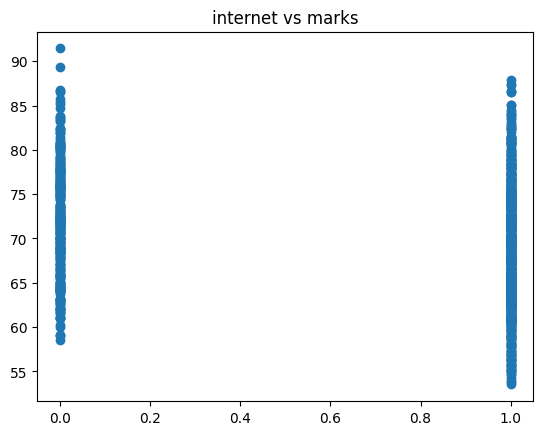

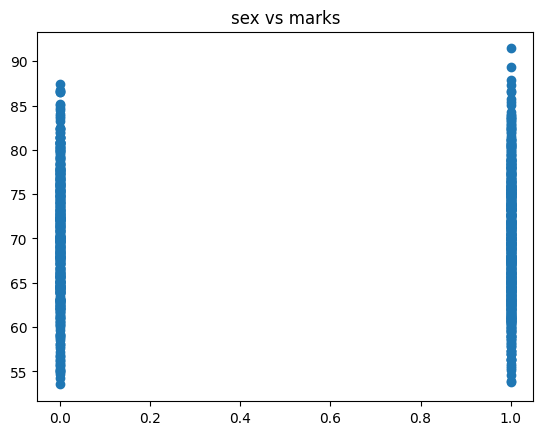

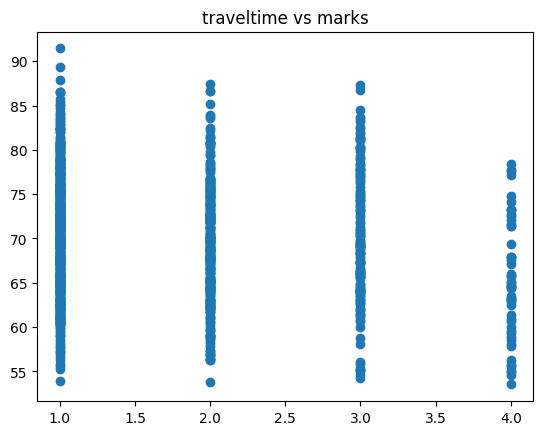

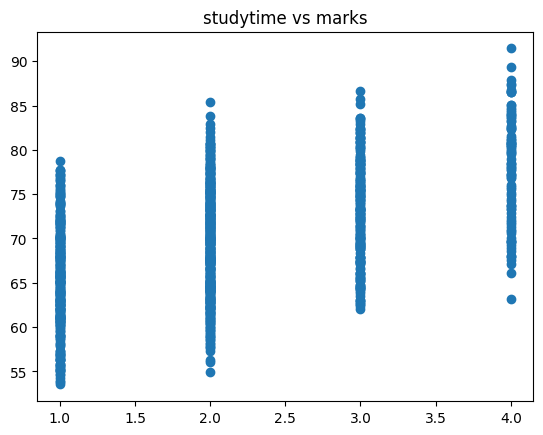

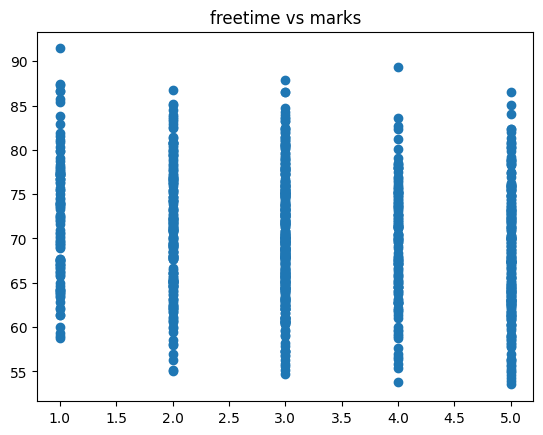

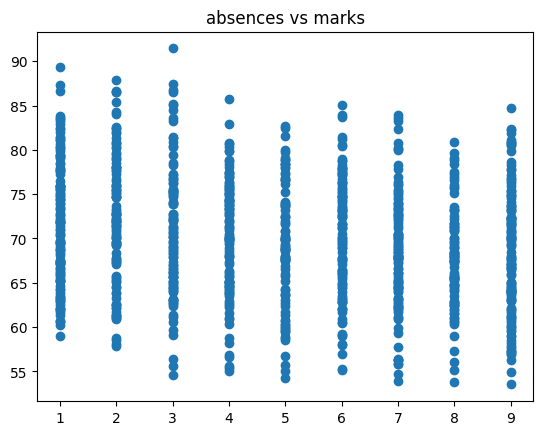

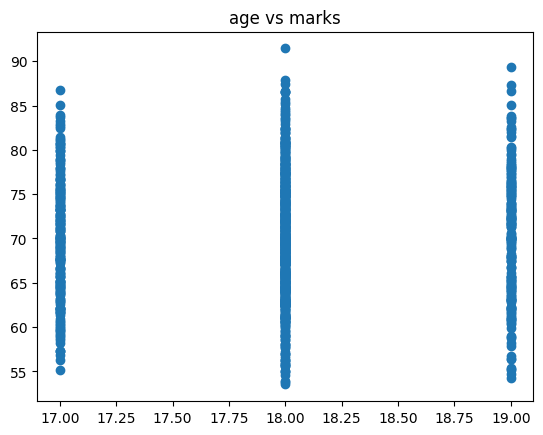

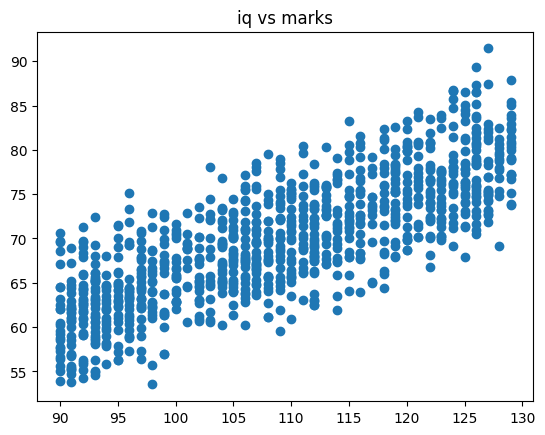

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,0,1,2,2,5,6,18,118,73.13
1,1,1,2,2,2,7,19,107,67.78
2,1,1,3,3,3,5,18,108,70.84
3,0,0,3,3,4,9,17,100,66.68
4,1,1,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,1,1,2,1,1,9,18,108,64.12
996,0,1,1,2,2,2,19,109,75.47
997,1,1,2,2,1,5,17,123,76.73
998,1,0,1,3,3,8,17,104,69.07


In [ ]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')

label_encoder=LabelEncoder()
#lABEL encoding part
data['sex'] = label_encoder.fit_transform(data['sex'])
data['internet']=label_encoder.fit_transform(data['internet'])
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
encoded_df=data
# Try plotting y_train with different features
for columns in encoded_df.drop(columns=['marks']).columns:
  plt.title(f"{columns} vs marks")
  plt.scatter(encoded_df[columns],encoded_df['marks'])
  plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train



def feature_changing(x_tra):
    # Create a copy of x_train to avoid modifying the original array
    # x_train_copy = np.copy(x_train)

    # Convert categorical values to numerical values
    x_tra[x_tra== 'no'] = 0
    x_tra[x_tra == 'yes'] = 1
    x_tra[x_tra == 'M'] = 1
    x_tra[x_tra == 'F'] = 0

    return x_tra


data


In [ ]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean=np.mean(x_train,axis=0)
    x_std=np.std(x_train,axis=0)
    x_train=x_train-x_mean
    x_train=x_train/x_std
  # ---------

    return x_train,x_std,x_mean

In [ ]:


def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    m=x_train.shape[0]
    predictions=np.dot(x_train,w)+b
    cos_t=(1/(2*m))*np.sum((predictions-y_train)**2)
    # return cost
  # ---------

    return cos_t

In [ ]:
def gradient_descent(x_train,y_train,w,b,l_r=0.01,epochs=100):

  # ---------
    # Your code here
    # Choose learning rate yourself


    m=x_train.shape[0]
    for i in range(epochs):
      var=np.dot(x_train,w)+b
      errors=var-y_train
      dj=(1/m)*np.dot(x_train.T,errors)
      db=(1/m)*np.sum(errors)

      w=w-l_r*dj
      b=b-l_r*db



  # ---------

    return w,b

**NOTE** If this cells shows 0 % accuracy then please restart and run all cells then it will get 100 % accuracy

In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")
y_predict,ans

Congratulations, your accuracy is 100.0%


(array([[74.59533072182084],
        [65.28411956265737],
        [79.23534636644642],
        [62.65679790614577],
        [67.82499406839604],
        [75.42534190799307],
        [77.05624526305262],
        [75.9442602930697],
        [72.50950191468624],
        [71.60441554440942],
        [65.03704731962993],
        [59.08507245765007],
        [70.00532936024896],
        [59.061609752358876],
        [70.11963021440107],
        [74.38606562293303],
        [57.706426959618135],
        [79.33583215951187],
        [57.53173741305395],
        [60.873100618071845],
        [74.70118242270985],
        [63.70482034193444],
        [79.42002062714731],
        [64.51504059514134],
        [79.51459026865305],
        [85.40484320407282],
        [68.13560929501904],
        [68.27623092660225],
        [62.30678037067075],
        [82.2542214473539],
        [61.25063147462146],
        [69.06169112927141],
        [78.40944215019803],
        [75.79449511254379],
        [80.1